In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist




In [2]:
# **(2a): Load Dataset Iris & Visualisasi**
# Load dataset Iris
df = pd.read_csv("https://raw.githubusercontent.com/Bahar812/Irish-Data-Mining/refs/heads/main/iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Pilih 2 fitur untuk visualisasi
feature_1, feature_2 = 'sepal_length', 'sepal_width'
X = df[[feature_1, feature_2]].values

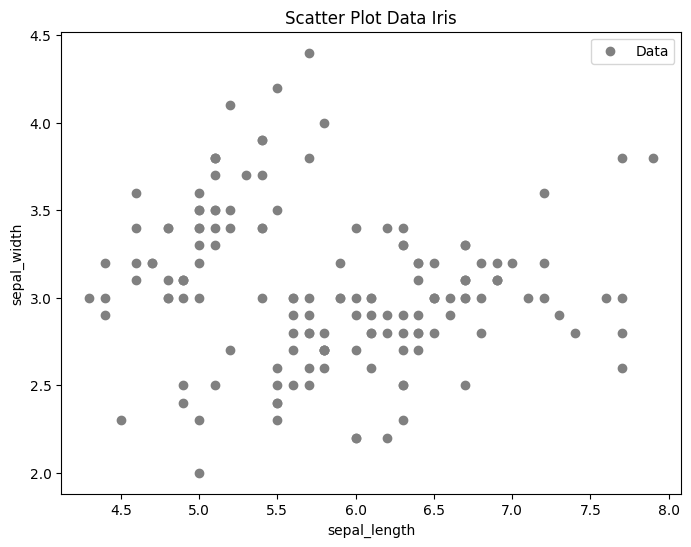

In [5]:
# Scatter plot data asli
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data')
plt.title("Scatter Plot Data Iris")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.show()

In [6]:
# **(2b): K-Means Clustering**
# Terapkan algoritma k-Means dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

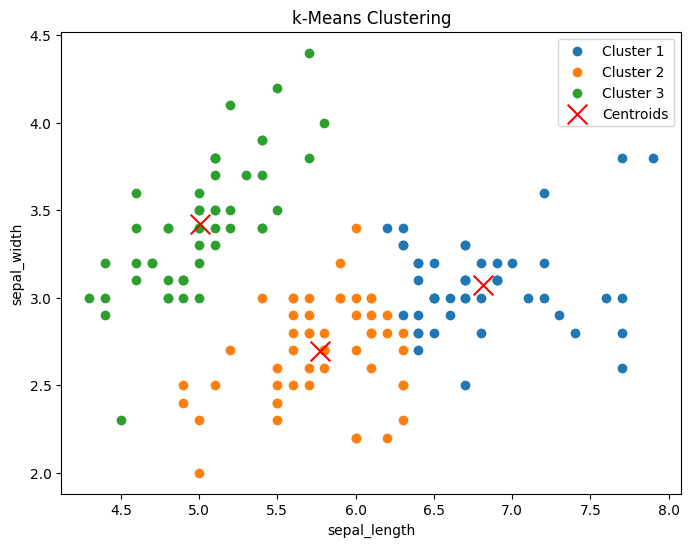

In [7]:
# Visualisasi hasil clustering k-Means
plt.figure(figsize=(8, 6))
for i in range(3):  # Karena k=3
    plt.scatter(X[labels_kmeans == i, 0], X[labels_kmeans == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title("k-Means Clustering")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.show()

In [10]:
# **(2c): Clustering dengan MST**
# Hitung jarak antar titik
dist_matrix = pdist(X)

In [11]:

# Buat MST menggunakan metode Single Linkage
linkage_matrix = linkage(dist_matrix, method='single')

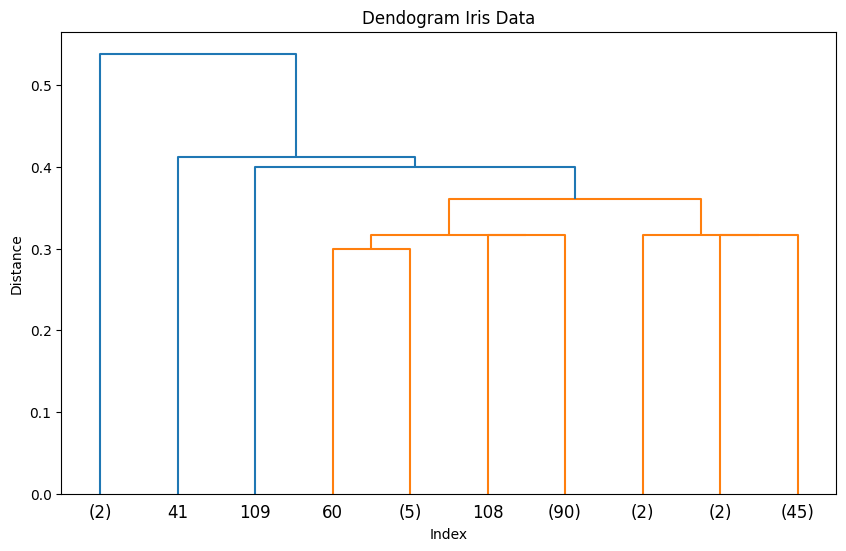

In [12]:

# Visualisasi dendogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title("Dendogram Iris Data")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [15]:

# Buat cluster berdasarkan dendogram
# Gunakan t=3 untuk membagi data menjadi 3 cluster
labels_mst = fcluster(linkage_matrix, t=3, criterion='maxclust')

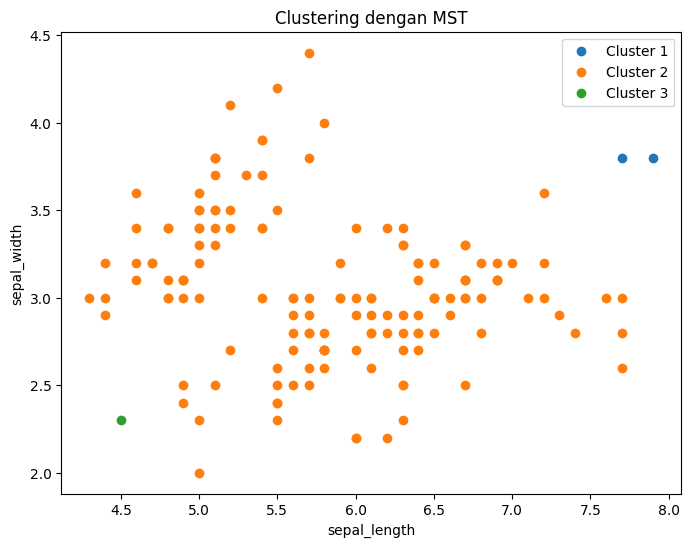

In [16]:
# **(2d): Visualisasi Hasil Clustering MST**
plt.figure(figsize=(8, 6))
for i in range(1, 4):  # Karena 3 cluster
    plt.scatter(X[labels_mst == i, 0], X[labels_mst == i, 1], label=f'Cluster {i}')
plt.title("Clustering dengan MST")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.show()